In [3]:
import mysql.connector 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('electricity-capacity-dataset.csv')

In [5]:
df.describe()

,Year,Power Generated (MW)
count,1344.000000,1344.000000
mean,2010.500000,2376.166731
std,3.453337,8476.157854
min,2005.000000,0.000000
25%,2007.750000,0.000000
50%,2010.500000,77.900000
75%,2013.250000,860.952500
max,2016.000000,80403.110000


In [6]:
df.shape

(1344, 4)

In [7]:
df.head(30)

,Region,Source,Year,Power Generated (MW)
0,Canada,Hydro,2005,72889.8310
1,Canada,Wind,2005,557.3700
2,Canada,Biomass,2005,1804.0882
3,Canada,Solar,2005,16.7500
4,Canada,Nuclear,2005,12805.0000
5,Canada,Coal,2005,16002.6400
6,Canada,Natural Gas,2005,13190.6100
7,Canada,Oil and Diesel,2005,4794.7600
8,Canada,Hydro,2006,72779.8310
9,Canada,Wind,2006,1443.0400


## Total energy generation by year and province

In [8]:
df.groupby(["Year", "Region"])["Power Generated (MW)"].sum().reset_index()

,Year,Region,Power Generated (MW)
0,2005,AB,12008.1500
1,2005,BC,15060.4600
2,2005,Canada,122061.0492
3,2005,MB,5593.6500
4,2005,NB,4234.5382
...,...,...,...
163,2016,ON,40214.9900
164,2016,PE,365.8300
165,2016,QC,45402.2570
166,2016,SK,4562.1550


## Total electricity generation by year and Source in Canada 


In [9]:
# Filter for Canada
canada_df = df[df['Region'] == 'Canada']

# Group by Year and sum Power Generated
total_generation = (
    canada_df.groupby(['Year', 'Source'])['Power Generated (MW)']
    .sum()
    .reset_index()
    .rename(columns={'Power Generated (MW)': 'Total Generation (MW)'})
)

print(total_generation)

    Year          Source  Total Generation (MW)
0   2005         Biomass              1804.0882
1   2005            Coal             16002.6400
2   2005           Hydro             72889.8310
3   2005     Natural Gas             13190.6100
4   2005         Nuclear             12805.0000
..   ...             ...                    ...
91  2016     Natural Gas             21499.4200
92  2016         Nuclear             14273.0000
93  2016  Oil and Diesel              3836.7550
94  2016           Solar              2309.5380
95  2016            Wind             11902.4000

[96 rows x 3 columns]


In [10]:
canada_df.head()

,Region,Source,Year,Power Generated (MW)
0,Canada,Hydro,2005,72889.8310
1,Canada,Wind,2005,557.3700
2,Canada,Biomass,2005,1804.0882
3,Canada,Solar,2005,16.7500
4,Canada,Nuclear,2005,12805.0000


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

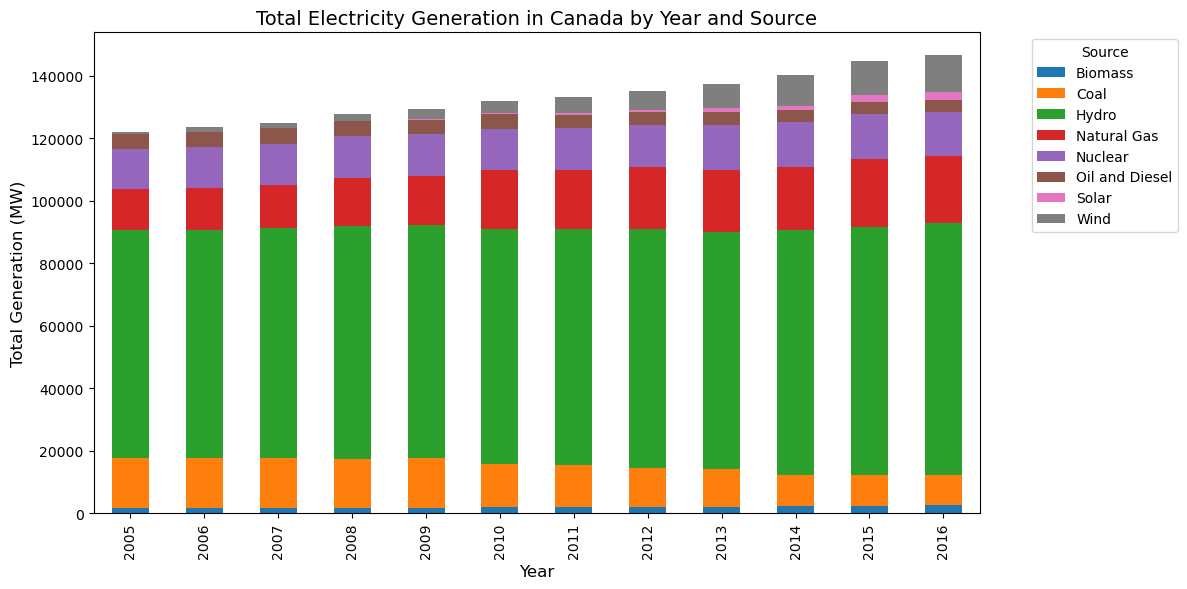

In [12]:
canada_pivot = total_generation.pivot(index="Year", columns="Source", values="Total Generation (MW)")

# Plot a stacked bar chart
canada_pivot.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12,6)
)

plt.title("Total Electricity Generation in Canada by Year and Source", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Generation (MW)", fontsize=12)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()





## Trend of a Specific Energy Source Over Time in canada


In [13]:
canada_df = df[df["Region"] == "Canada"]

# Choose specific energy source, e.g., "Hydro"
energy = "Hydro"
# Filter for that energy source
source_df = (
    canada_df[canada_df["Source"] == energy]
    .groupby("Year")["Power Generated (MW)"]
    .sum()
    .reset_index()
)


print(source_df)




    Year  Power Generated (MW)
0   2005             72889.831
1   2006             72779.831
2   2007             73580.831
3   2008             74483.831
4   2009             74765.831
5   2010             75160.831
6   2011             75476.681
7   2012             76531.981
8   2013             76003.281
9   2014             78576.701
10  2015             79434.060
11  2016             80403.110


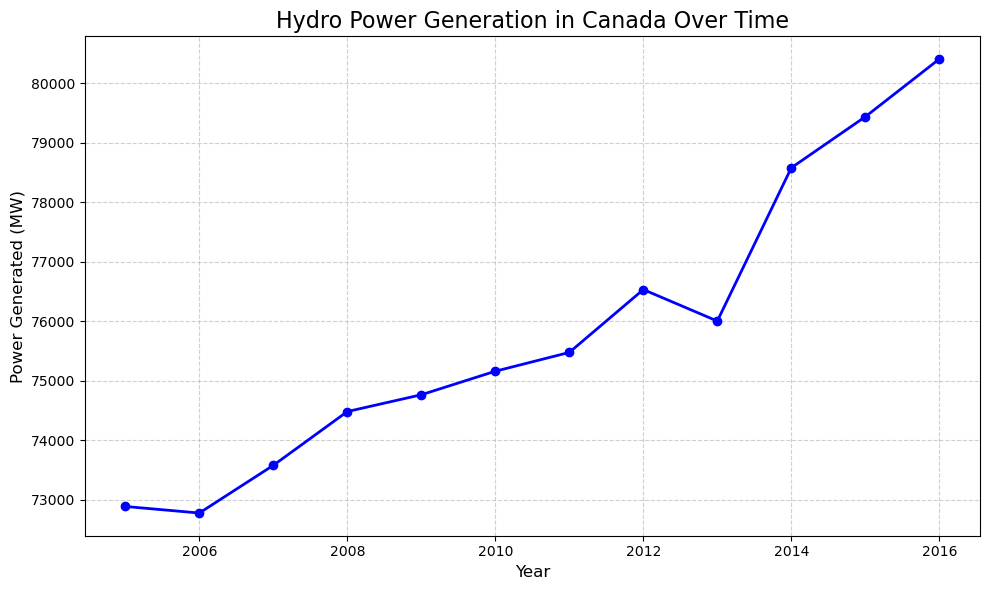

In [14]:
plt.figure(figsize=(10,6))
plt.plot(source_df["Year"], source_df["Power Generated (MW)"],
         marker="o", linestyle="-", linewidth=2, color="blue")
plt.title(f"{energy} Power Generation in Canada Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Power Generated (MW)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Which Region Generate the Most Electricity in a Specific Year

In [15]:
# Exclude Canada from dataset
non_canada_df= df[df["Region"] != "Canada"]

# Choose specific Year
Year = 2005

# Total electricity generation by province
total_generatin_by_province = (
    non_canada_df[non_canada_df["Year"] == Year]
    .groupby(["Year","Region"])["Power Generated (MW)"]
    .sum()
    .reset_index()
    .sort_values(by=["Power Generated (MW)"], ascending= False)
    .reset_index(drop=True)  # removes old index numbers
)

print(total_generatin_by_province)





    Year Region  Power Generated (MW)
0   2005     QC            39258.6800
1   2005     ON            31537.6700
2   2005     BC            15060.4600
3   2005     AB            12008.1500
4   2005     NL             7692.3810
5   2005     MB             5593.6500
6   2005     NB             4234.5382
7   2005     SK             3733.2900
8   2005     NS             2395.8200
9   2005     NT              204.4800
10  2005     PE              175.6000
11  2005     YT              112.0500
12  2005     NU               54.2800


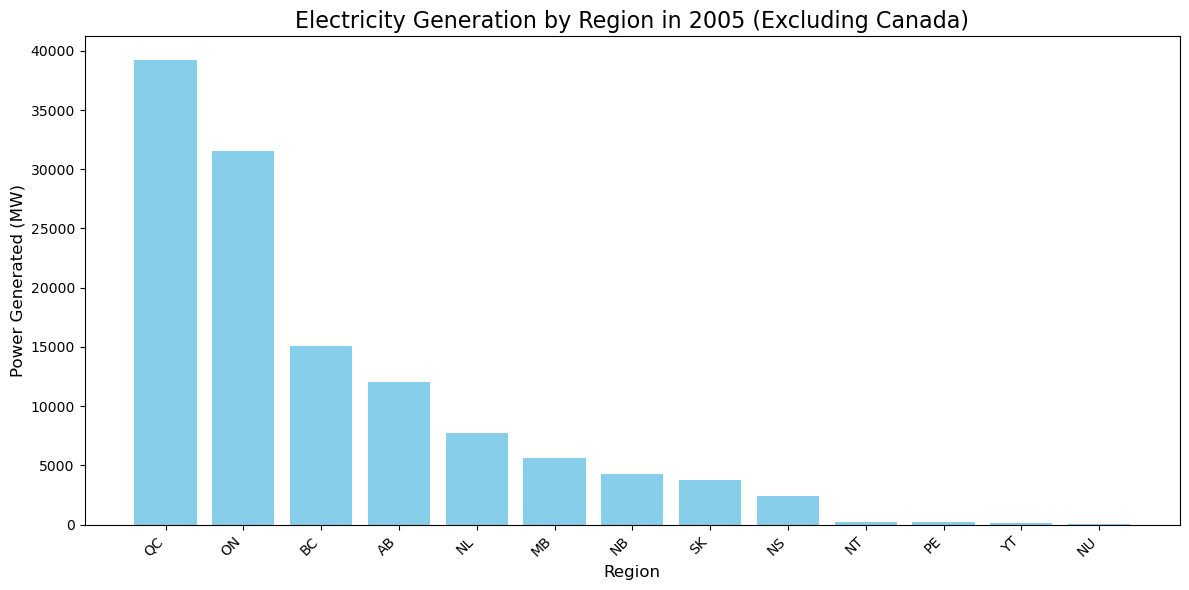

In [16]:
plt.figure(figsize=(12,6))
plt.bar(total_generatin_by_province ["Region"],
        total_generatin_by_province ["Power Generated (MW)"],
        color="skyblue")

plt.title(f"Electricity Generation by Region in {Year} (Excluding Canada)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Power Generated (MW)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Total capacity grow over time

In [17]:
# Exclude Canada from dataset
non_canada_df= df[df["Region"] != "Canada"]
total_generation = non_canada_df.groupby("Year")["Power Generated (MW)"].sum().reset_index()
total_generation["Over_years Growth(MW)"] = total_generation["Power Generated (MW)"].diff()
total_generation["Year_over_year Growth (%)"] = total_generation["Power Generated (MW)"].pct_change() * 100
total_generation["Year_over_year Growth (%)"] = total_generation["Year_over_year Growth (%)"].round()

print(total_generation)

    Year  Power Generated (MW)  Over_years Growth(MW)  \
0   2005           122061.0492                    NaN   
1   2006           123522.7592              1461.7100   
2   2007           125012.6192              1489.8600   
3   2008           127891.9192              2879.3000   
4   2009           129312.4392              1420.5200   
5   2010           131900.4092              2587.9700   
6   2011           133145.3612              1244.9520   
7   2012           135130.1422              1984.7810   
8   2013           137270.5482              2140.4060   
9   2014           140110.5122              2839.9640   
10  2015           144838.3312              4727.8190   
11  2016           146587.9530              1749.6218   

    Year_over_year Growth (%)  
0                         NaN  
1                         1.0  
2                         1.0  
3                         2.0  
4                         1.0  
5                         2.0  
6                         1.0  
7 

## The Most Used Energy Source Each Year

In [18]:
non_canada_df= df[df["Region"] != "Canada"]
total_generation_by_year = non_canada_df.groupby(["Year", "Source"])["Power Generated (MW)"].sum().reset_index()

most_used_each_year = (
    total_generation_by_year.loc[
        total_generation_by_year.groupby('Year')['Power Generated (MW)'].idxmax()
    ]
    .reset_index(drop=True)
)

print(most_used_each_year)


    Year Source  Power Generated (MW)
0   2005  Hydro             72889.831
1   2006  Hydro             72779.831
2   2007  Hydro             73580.831
3   2008  Hydro             74483.831
4   2009  Hydro             74765.831
5   2010  Hydro             75160.831
6   2011  Hydro             75476.681
7   2012  Hydro             76531.981
8   2013  Hydro             76003.281
9   2014  Hydro             78576.701
10  2015  Hydro             79434.060
11  2016  Hydro             80403.110


 ## Compare Renewable vs Non-Renewable Energy Production in Canada over years 

In [19]:
canada_df =canada_df[canada_df["Region"]=="Canada"]

Renewable_energy_generation =  ["Hydro", "Wind", "Solar", "Biomass"]
Non_Renewable_energy_generation = ["Nuclear", "Coal", "Natural Gas", "Oil and Diesel"]
energy_comparison = (
    canada_df.groupby("Year")
    .apply(lambda x: pd.Series({
        "Renewable": x.loc[x["Source"].isin(Renewable_energy_generation ), "Power Generated (MW)"].sum(),
        "Non-Renewable": x.loc[x["Source"].isin(Non_Renewable_energy_generation), "Power Generated (MW)"].sum()
    }))
    .reset_index()
)



print(energy_comparison)

    Year   Renewable  Non-Renewable
0   2005  75268.0392      46793.010
1   2006  76054.0392      47468.720
2   2007  77240.5292      47772.090
3   2008  78572.3792      49319.540
4   2009  79904.3292      49408.110
5   2010  81056.8892      50843.520
6   2011  82965.7062      50179.655
7   2012  85170.4872      49959.655
8   2013  86696.7532      50573.795
9   2014  92159.0972      47951.415
10  2015  95055.7562      49782.575
11  2016  97317.3380      49270.615


In [20]:
import matplotlib.pyplot as plt
import numpy as np

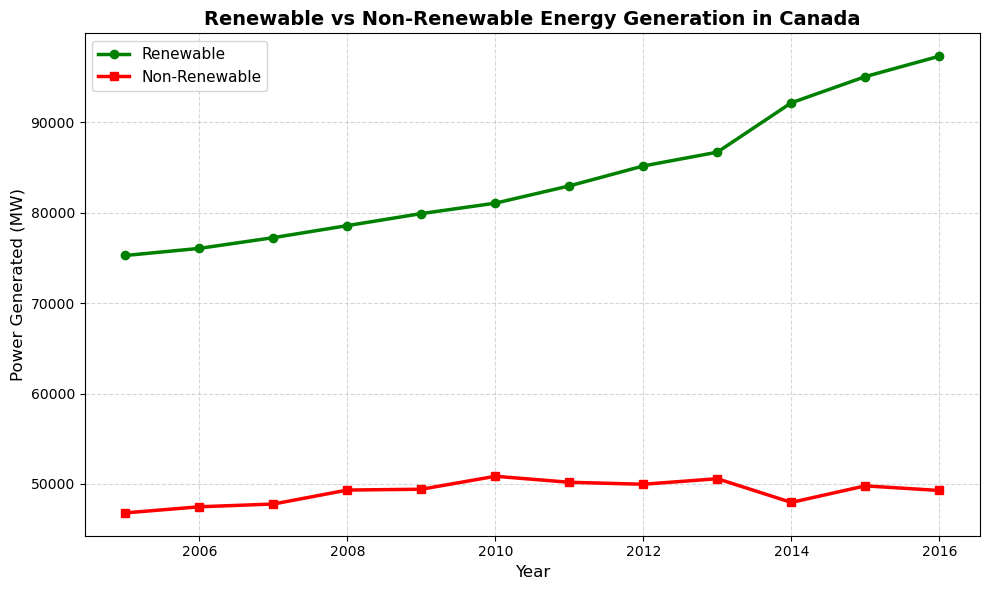

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(energy_comparison["Year"], energy_comparison["Renewable"],
         marker='o', linewidth=2.5, label="Renewable", color="green")
plt.plot(energy_comparison["Year"], energy_comparison["Non-Renewable"],
         marker='s', linewidth=2.5, label="Non-Renewable", color="red")

plt.title("Renewable vs Non-Renewable Energy Generation in Canada", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Power Generated (MW)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

## The Fastest-Growing Energy Source

In [37]:
import pandas as pd
import matplotlib.pyplot as plt




In [39]:

yearly_totals = (
    df.groupby(["Source", "Year"])["Power Generated (MW)"]
    .sum()
    .reset_index()
    .sort_values(["Source", "Year"])
)

yearly_totals["Previous_Year_Capacity"] = (
    yearly_totals.groupby("Source")["Power Generated (MW)"].shift(1)
)

yearly_totals["Growth_Percentage"] = (
    (yearly_totals["Power Generated (MW)"] - yearly_totals["Previous_Year_Capacity"])
    / yearly_totals["Previous_Year_Capacity"]
) * 100


yearly_totals = yearly_totals.replace([float("inf"), -float("inf")], pd.NA).dropna(subset=["Growth_Percentage"])


avg_growth = (
    yearly_totals.groupby("Source")["Growth_Percentage"]
    .mean()
    .reset_index()
    .sort_values("Growth_Percentage", ascending=False)
)


fastest_growing = avg_growth.iloc[0]
print("The Fastest-Growing Energy Source in Canada")
print(f"Source: {fastest_growing['Source']}")
print(f"Average Growth Rate: {fastest_growing['Growth_Percentage']:.2f}%")

# Optional: display the full ranking
print("\nFull Ranking of Energy Sources by Average Growth Rate:")
print(avg_growth)

The Fastest-Growing Energy Source in Canada
Source: Solar
Average Growth Rate: 65.47%

Full Ranking of Energy Sources by Average Growth Rate:
           Source  Growth_Percentage
6           Solar          65.474554
7            Wind          36.147428
3     Natural Gas           4.745545
0         Biomass           3.968834
4         Nuclear           1.018966
2           Hydro           0.900762
5  Oil and Diesel          -1.901982
1            Coal          -4.295752
